Import libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.12.0'

Preprocess/Transform data to avoid overfitting and apply feature scaling

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


Mount Google Drive

In [ ]:
from google.colab import drive

# This will prompt you to authorize access to your Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the training set with 64x64 images

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML/CNN/dataset/training_set', target_size=(64,64),batch_size=32, class_mode='binary')
#training_set = train_datagen.flow_from_directory('/dataset/training_set', target_size=(64,64),batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


Load the testing set with 64x64 images

In [ ]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML/CNN/dataset/test_set', target_size=(64,64), batch_size=32, class_mode='binary')
#test_set = test_datagen.flow_from_directory('/dataset/test_set', target_size=(64,64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


Initialize CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Add convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Add second convolutional layer
(copy from the above, except remove the input_shape as this is the second layer, only the first layer needs to specify the input_shape)

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Add Flattening layer

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Add connecting layer to ANN

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Add output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile the CNN

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the CNN

Using free Google GPU (Graphics Processing Unit) Enable the GPU in the runtime menu

In [ ]:
# Check if GPU is available and its name
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 1516s 6s/step - loss: 0.6773 - accuracy: 0.5840 - val_loss: 0.6079 - val_accuracy: 0.6785
Epoch 2/25
250/250 [==============================] - 35s 141ms/step - loss: 0.6118 - accuracy: 0.6581 - val_loss: 0.7291 - val_accuracy: 0.5890
Epoch 3/25
250/250 [==============================] - 35s 140ms/step - loss: 0.5583 - accuracy: 0.7097 - val_loss: 0.5472 - val_accuracy: 0.7230
Epoch 4/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5189 - accuracy: 0.7396 - val_loss: 0.5273 - val_accuracy: 0.7430
Epoch 5/25
250/250 [==============================] - 35s 139ms/step - loss: 0.4980 - accuracy: 0.7546 - val_loss: 0.4820 - val_accuracy: 0.7655
Epoch 6/25
250/250 [==============================] - 36s 142ms/step - loss: 0.4804 - accuracy: 0.7648 - val_loss: 0.4859 - val_accuracy: 0.7745
Epoch 7/25
250/250 [==============================] - 35s 142ms/step - loss: 0.4642 - accuracy: 0.7811 - val_loss: 0.4716 - val_acc

Make prediction

In [ ]:
# Define the path in your Google Drive where you want to save the model
model_save_path = '/content/drive/MyDrive/ML/CNN/trained_model_final.h5'

# Save the model to the specified path
cnn.save(model_save_path)

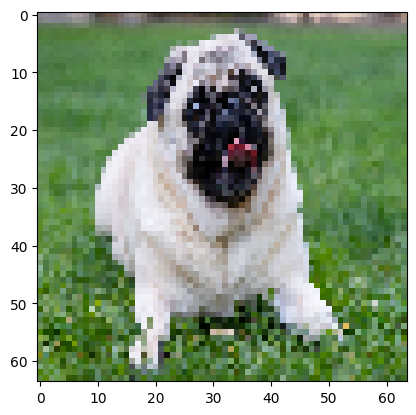

1/1 [==============================] - 0s 38ms/step
[[1.]]
{'cats': 0, 'dogs': 1}
dog


In [ ]:
import numpy as np
from keras.preprocessing.image import image_utils
test_image = image_utils.load_img('/content/drive/MyDrive/ML/CNN/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(test_image)
plt.show()
test_image = image_utils.img_to_array(test_image);
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)
print(training_set.class_indices)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

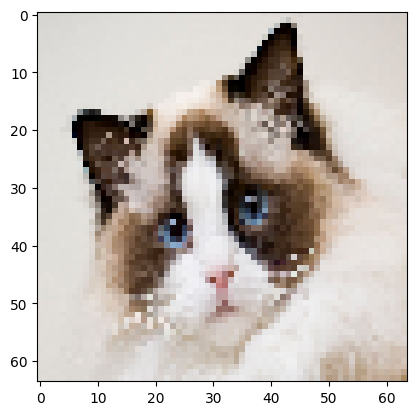

1/1 [==============================] - 0s 18ms/step
[[0.]]
{'cats': 0, 'dogs': 1}
cat


In [ ]:
test_image = image_utils.load_img('/content/drive/MyDrive/ML/CNN/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
# Display the image using Matplotlib
plt.imshow(test_image)
plt.show()
test_image = image_utils.img_to_array(test_image);
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)
print(training_set.class_indices)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

Using the saved already trained model

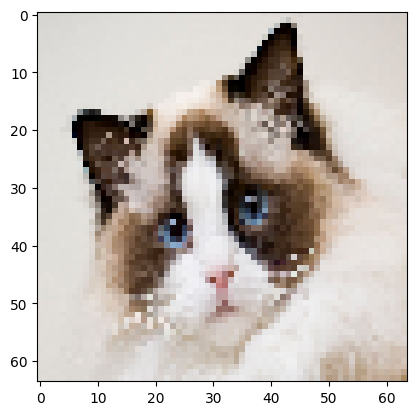

1/1 [==============================] - 0s 108ms/step
[[0.]]
{'cats': 0, 'dogs': 1}
cat


In [ ]:
from keras.models import load_model

# Load the saved model from Google Drive
saved_model = load_model(model_save_path)

test_image = image_utils.load_img('/content/drive/MyDrive/ML/CNN/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
# Display the image using Matplotlib
plt.imshow(test_image)
plt.show()
test_image = image_utils.img_to_array(test_image);
test_image = np.expand_dims(test_image, axis=0)
saved_model.predict(test_image)
print(result)
print(training_set.class_indices)
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)